# FIFA 18 Player Analysis

The data set I used for this project is FIFA 18 Player Dataset.

it is a collection of data of football players featured in the FIFA 18 video game.

This dataset includes various features about each player's basic details, skills, proficiancy in each position, and Value of the player.

### In this project I am trying build a model to predict market value of a player based on the player's skills.

Features:

* Unnamed: 0: An unnamed index column.

* Name: The player's name.

* Age: The age of the player.

* Photo: URL of the player's photo.

* Nationality: The player's nationality.

* Flag: URL of the player's national flag.

* Overall: The player's overall rating.

* Potential: The player's potential rating.

* Club: The club to which the player belongs.

* Club Logo: URL of the club's logo.

* Value: The market value of the player.

* Wage: The weekly wage of the player.

* Special: A special score representing unique abilities.

* The below are features mentioning various skills of players :-

    Acceleration, Aggression, Agility, Balance, Ball control, Composure, Crossing, Curve, Dribbling, Finishing, Free kick accuracy, GK diving, GK handling, GK kicking, GK positioning, GK reflexes, Heading accuracy, Interceptions, Jumping, Long passing, Long shots, Marking, Penalties, Positioning, Reactions, Short passing, Shot power, Sliding tackle, Sprint speed, Stamina, Standing tackle, Strength, Vision, Volleys

* The below are features mentioning proficiancy of the player in each position :-

    CAM, CB, CDM, CF, CM, ID, LAM, LB, LCB, LCM, LDM, LF, LM, LS, LW, LWB, RAM, RB, RCB, RCM, RDM, RF, RM, RS, RW, RWB, ST

# Preprocessing - 1

In [40]:
import re
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [41]:
data = pd.read_csv("/content/drive/MyDrive/PYTHON/data_science/Projects/3. FIFA 18 Player Value Prediction/players.csv")

<ipython-input-41-7f747707ba94>:1: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/PYTHON/data_science/Projects/3. FIFA 18 Player Value Prediction/players.csv")


In [42]:
data.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
data.shape

(17981, 75)

In [44]:
data.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [45]:
data = data.drop(['Unnamed: 0', 'Photo', 'Flag', 'Club Logo',
              'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID', 'LAM',
              'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS',
              'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM',
              'RF', 'RM','RS', 'RW', 'RWB', 'ST'], axis=1)

In [46]:
data.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'Preferred Positions'],
      dtype='object')

In [47]:
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228,89,...,83,94,23,91,92,31,80,85,88,ST LW
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154,92,...,88,85,26,87,73,28,59,90,85,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100,94,...,81,80,33,90,78,24,53,80,83,LW
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,2291,88,...,83,87,38,77,89,45,80,84,88,ST
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,1493,58,...,55,25,11,61,44,10,83,70,11,GK


In [48]:
data.sort_values(by='Overall', ascending=False, inplace=True, ignore_index=True)
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228,89,...,83,94,23,91,92,31,80,85,88,ST LW
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154,92,...,88,85,26,87,73,28,59,90,85,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100,94,...,81,80,33,90,78,24,53,80,83,LW
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,2291,88,...,83,87,38,77,89,45,80,84,88,ST
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,1493,58,...,55,25,11,61,44,10,83,70,11,GK


In [49]:
data.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'Preferred Positions'],
      dtype='object')

In [50]:
data = data[['Name', 'Nationality', 'Club', 'Preferred Positions', 'Age',
         'Special', 'Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'Overall', 'Potential', 'Value','Wage' ]]

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 17981 non-null  object
 1   Nationality          17981 non-null  object
 2   Club                 17733 non-null  object
 3   Preferred Positions  17981 non-null  object
 4   Age                  17981 non-null  int64 
 5   Special              17981 non-null  int64 
 6   Acceleration         17981 non-null  object
 7   Aggression           17981 non-null  object
 8   Agility              17981 non-null  object
 9   Balance              17981 non-null  object
 10  Ball control         17981 non-null  object
 11  Composure            17981 non-null  object
 12  Crossing             17981 non-null  object
 13  Curve                17981 non-null  object
 14  Dribbling            17981 non-null  object
 15  Finishing            17981 non-null  object
 16  Free

In [52]:
data.columns

Index(['Name', 'Nationality', 'Club', 'Preferred Positions', 'Age', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'Overall', 'Potential', 'Value',
       'Wage'],
      dtype='object')

In [53]:
object_cols = data.select_dtypes( include='object' ).columns.tolist()
[ (i, v) for i, v in enumerate(object_cols) ]

[(0, 'Name'),
 (1, 'Nationality'),
 (2, 'Club'),
 (3, 'Preferred Positions'),
 (4, 'Acceleration'),
 (5, 'Aggression'),
 (6, 'Agility'),
 (7, 'Balance'),
 (8, 'Ball control'),
 (9, 'Composure'),
 (10, 'Crossing'),
 (11, 'Curve'),
 (12, 'Dribbling'),
 (13, 'Finishing'),
 (14, 'Free kick accuracy'),
 (15, 'GK diving'),
 (16, 'GK handling'),
 (17, 'GK kicking'),
 (18, 'GK positioning'),
 (19, 'GK reflexes'),
 (20, 'Heading accuracy'),
 (21, 'Interceptions'),
 (22, 'Jumping'),
 (23, 'Long passing'),
 (24, 'Long shots'),
 (25, 'Marking'),
 (26, 'Penalties'),
 (27, 'Positioning'),
 (28, 'Reactions'),
 (29, 'Short passing'),
 (30, 'Shot power'),
 (31, 'Sliding tackle'),
 (32, 'Sprint speed'),
 (33, 'Stamina'),
 (34, 'Standing tackle'),
 (35, 'Strength'),
 (36, 'Vision'),
 (37, 'Volleys'),
 (38, 'Value'),
 (39, 'Wage')]

In [54]:
for i in object_cols[4:]:
  print(i, "\n")
  print( data[i].unique() )
  print('*'*100)

Acceleration 

['89' '92' '94' '88' '58' '79' '57' '93' '60' '78' '75' '49' '68' '90'
 '46' '76' '62' '87' '63' '70' '65' '72' '95' '77' '43' '55' '54' '67'
 '69' '82' '71' '85' '74' '40' '80' '86' '48' '84' '45' '61' '64' '73'
 '38' '51' '53' '91' '42' '59' '44' '81' '66' '39' '50' '34' '52' '31'
 '30' '96' '83' '47' '26' '56' '70+9' '32' '49-1' '36' '35' '80+1' '41'
 '67+2' '37' '33' '28' '20' '79-2' '74-3' '91-2' '75+1' '41-6' '65-2' '29'
 '70+3' '74+1' '17' '74+2' '75+5' '89-2' '71+2' '71+4' '68+1' '78+1' '25'
 '86+1' '27' '66-1' '58-10' '24' '15' '22' '71-3' '74+4' '66+1' '21' '18'
 '64-2' '23' '78+3' '57-4' '80+2' '19' '82-3' '73+9' '68+2' '55-8' '68+3'
 '82+10' '77+3' '49-10' '16' '43-2' '55-1' '13' '72+1' '79+8' '70-2'
 '61+1' '14' '69+3' '81+4' '60-2' '86+7' '33+10' '92+2' '64+5' '65-10'
 '75-6' '73+4' '64-3' '12' '76-1' '62+2' '44-2' '77+1' '82+3' '58+8'
 '65+7' '68-1' '73+3' '59+1' '61+3' '78+14' '11' '85-1' '64+12' '59-1'
 '75+4' '73+10' '71+6' '77+13' '62+1' '64-5']
******

In [55]:

def str_math(s):
  s = str(s)
  m = re.match(r"([\d.]*)([+*\/-]*)(\d*)", s)

  if not m.group(1) : return 0

  num1 = float( m.group(1) )

  if not m.group(2): return num1

  num2 = float( m.group(3) )
  sign = m.group(2)

  if sign == '+':
    return num1 + num2
  elif sign == '-':
    return num1 - num2
  elif sign == '*':
    return num1 * num2
  elif sign == '/':
    return num1 / num2


In [56]:
print( str_math('2') )

print( str_math('22+3') )

print( str_math('512-11') )

2.0
25.0
501.0


In [57]:
data['Acceleration'].map(str_math).unique()

array([89., 92., 94., 88., 58., 79., 57., 93., 60., 78., 75., 49., 68.,
       90., 46., 76., 62., 87., 63., 70., 65., 72., 95., 77., 43., 55.,
       54., 67., 69., 82., 71., 85., 74., 40., 80., 86., 48., 84., 45.,
       61., 64., 73., 38., 51., 53., 91., 42., 59., 44., 81., 66., 39.,
       50., 34., 52., 31., 30., 96., 83., 47., 26., 56., 32., 36., 35.,
       41., 37., 33., 28., 20., 29., 17., 25., 27., 24., 15., 22., 21.,
       18., 23., 19., 16., 13., 14., 12., 11.])

In [58]:
for i in object_cols[4:-2]:
  data[i] = data[i].map(str_math)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 17981 non-null  object 
 1   Nationality          17981 non-null  object 
 2   Club                 17733 non-null  object 
 3   Preferred Positions  17981 non-null  object 
 4   Age                  17981 non-null  int64  
 5   Special              17981 non-null  int64  
 6   Acceleration         17981 non-null  float64
 7   Aggression           17981 non-null  float64
 8   Agility              17981 non-null  float64
 9   Balance              17981 non-null  float64
 10  Ball control         17981 non-null  float64
 11  Composure            17981 non-null  float64
 12  Crossing             17981 non-null  float64
 13  Curve                17981 non-null  float64
 14  Dribbling            17981 non-null  float64
 15  Finishing            17981 non-null 

In [60]:
data['Wage'].unique()

array(['€565K', '€280K', '€510K', '€230K', '€355K', '€215K', '€295K',
       '€340K', '€275K', '€310K', '€370K', '€110K', '€225K', '€325K',
       '€265K', '€190K', '€285K', '€125K', '€240K', '€175K', '€165K',
       '€210K', '€150K', '€82K', '€250K', '€260K', '€91K', '€220K',
       '€130K', '€160K', '€195K', '€135K', '€115K', '€94K', '€235K',
       '€92K', '€120K', '€205K', '€145K', '€49K', '€81K', '€170K',
       '€105K', '€155K', '€61K', '€46K', '€180K', '€60K', '€77K', '€200K',
       '€54K', '€68K', '€59K', '€38K', '€69K', '€36K', '€96K', '€39K',
       '€84K', '€66K', '€73K', '€21K', '€19K', '€27K', '€15K', '€70K',
       '€0', '€87K', '€40K', '€65K', '€47K', '€10K', '€67K', '€62K',
       '€80K', '€25K', '€50K', '€89K', '€75K', '€58K', '€37K', '€78K',
       '€28K', '€53K', '€88K', '€18K', '€45K', '€100K', '€140K', '€31K',
       '€56K', '€57K', '€35K', '€30K', '€90K', '€51K', '€1K', '€99K',
       '€71K', '€64K', '€48K', '€12K', '€85K', '€52K', '€29K', '€72K',
       '€16K', 

In [61]:
data['Wage'] = data['Wage'].str.replace('€', '').str.replace('K', '*1000').map(str_math)#.replace( 0, None )

# '€565K' -> this value will become -> '565*1000' -> after that str_math operation is done.

# nan -> will become 0. we will deal with it later


In [62]:
data['Wage'].unique()

array([565000., 280000., 510000., 230000., 355000., 215000., 295000.,
       340000., 275000., 310000., 370000., 110000., 225000., 325000.,
       265000., 190000., 285000., 125000., 240000., 175000., 165000.,
       210000., 150000.,  82000., 250000., 260000.,  91000., 220000.,
       130000., 160000., 195000., 135000., 115000.,  94000., 235000.,
        92000., 120000., 205000., 145000.,  49000.,  81000., 170000.,
       105000., 155000.,  61000.,  46000., 180000.,  60000.,  77000.,
       200000.,  54000.,  68000.,  59000.,  38000.,  69000.,  36000.,
        96000.,  39000.,  84000.,  66000.,  73000.,  21000.,  19000.,
        27000.,  15000.,  70000.,      0.,  87000.,  40000.,  65000.,
        47000.,  10000.,  67000.,  62000.,  80000.,  25000.,  50000.,
        89000.,  75000.,  58000.,  37000.,  78000.,  28000.,  53000.,
        88000.,  18000.,  45000., 100000., 140000.,  31000.,  56000.,
        57000.,  35000.,  30000.,  90000.,  51000.,   1000.,  99000.,
        71000.,  640

In [63]:
data['Value'].unique()

array(['€95.5M', '€105M', '€123M', '€97M', '€61M', '€92M', '€64.5M',
       '€90.5M', '€79M', '€77M', '€52M', '€69.5M', '€4.5M', '€38M',
       '€66.5M', '€67.5M', '€57M', '€59M', '€83M', '€40M', '€36M', '€27M',
       '€34M', '€60M', '€48M', '€44M', '€70.5M', '€75M', '€29.5M',
       '€37.5M', '€29M', '€48.5M', '€65M', '€52.5M', '€44.5M', '€43M',
       '€34.5M', '€25.5M', '€13.5M', '€41M', '€22.5M', '€46M', '€10.5M',
       '€42.5M', '€33M', '€40.5M', '€45M', '€56M', '€47.5M', '€56.5M',
       '€28.5M', '€43.5M', '€30.5M', '€24.5M', '€25M', '€26M', '€5M',
       '€42M', '€35.5M', '€22M', '€39M', '€30M', '€46.5M', '€51.5M',
       '€31.5M', '€28M', '€18.5M', '€9M', '€23M', '€21M', '€31M', '€11M',
       '€35M', '€39.5M', '€32M', '€32.5M', '€14.5M', '€16.5M', '€17.5M',
       '€23.5M', '€0', '€17M', '€19M', '€15.5M', '€3.5M', '€12.5M',
       '€19.5M', '€6M', '€20M', '€24M', '€27.5M', '€37M', '€38.5M',
       '€26.5M', '€41.5M', '€18M', '€15M', '€21.5M', '€20.5M', '€14M',
       '€8.5M

In [64]:
data['Value'] = data['Value'].str.replace('€', '').str.replace('K', '*1000').str.replace('M', '*1000000').map(str_math)#.replace( 0, None )

# '€95.5M' -> this value will become -> '95*1000000' -> after that str_math operation is done.

# '€565K' -> this value will become -> '565*1000' -> after that str_math operation is done.

# nan -> will become 0. we will deal with it later


In [65]:
data['Value'].unique()

array([9.55e+07, 1.05e+08, 1.23e+08, 9.70e+07, 6.10e+07, 9.20e+07,
       6.45e+07, 9.05e+07, 7.90e+07, 7.70e+07, 5.20e+07, 6.95e+07,
       4.50e+06, 3.80e+07, 6.65e+07, 6.75e+07, 5.70e+07, 5.90e+07,
       8.30e+07, 4.00e+07, 3.60e+07, 2.70e+07, 3.40e+07, 6.00e+07,
       4.80e+07, 4.40e+07, 7.05e+07, 7.50e+07, 2.95e+07, 3.75e+07,
       2.90e+07, 4.85e+07, 6.50e+07, 5.25e+07, 4.45e+07, 4.30e+07,
       3.45e+07, 2.55e+07, 1.35e+07, 4.10e+07, 2.25e+07, 4.60e+07,
       1.05e+07, 4.25e+07, 3.30e+07, 4.05e+07, 4.50e+07, 5.60e+07,
       4.75e+07, 5.65e+07, 2.85e+07, 4.35e+07, 3.05e+07, 2.45e+07,
       2.50e+07, 2.60e+07, 5.00e+06, 4.20e+07, 3.55e+07, 2.20e+07,
       3.90e+07, 3.00e+07, 4.65e+07, 5.15e+07, 3.15e+07, 2.80e+07,
       1.85e+07, 9.00e+06, 2.30e+07, 2.10e+07, 3.10e+07, 1.10e+07,
       3.50e+07, 3.95e+07, 3.20e+07, 3.25e+07, 1.45e+07, 1.65e+07,
       1.75e+07, 2.35e+07, 0.00e+00, 1.70e+07, 1.90e+07, 1.55e+07,
       3.50e+06, 1.25e+07, 1.95e+07, 6.00e+06, 2.00e+07, 2.40e

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 17981 non-null  object 
 1   Nationality          17981 non-null  object 
 2   Club                 17733 non-null  object 
 3   Preferred Positions  17981 non-null  object 
 4   Age                  17981 non-null  int64  
 5   Special              17981 non-null  int64  
 6   Acceleration         17981 non-null  float64
 7   Aggression           17981 non-null  float64
 8   Agility              17981 non-null  float64
 9   Balance              17981 non-null  float64
 10  Ball control         17981 non-null  float64
 11  Composure            17981 non-null  float64
 12  Crossing             17981 non-null  float64
 13  Curve                17981 non-null  float64
 14  Dribbling            17981 non-null  float64
 15  Finishing            17981 non-null 

In [67]:
data.columns

Index(['Name', 'Nationality', 'Club', 'Preferred Positions', 'Age', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'Overall', 'Potential', 'Value',
       'Wage'],
      dtype='object')

In [68]:
data.isnull().sum()

Name                     0
Nationality              0
Club                   248
Preferred Positions      0
Age                      0
Special                  0
Acceleration             0
Aggression               0
Agility                  0
Balance                  0
Ball control             0
Composure                0
Crossing                 0
Curve                    0
Dribbling                0
Finishing                0
Free kick accuracy       0
GK diving                0
GK handling              0
GK kicking               0
GK positioning           0
GK reflexes              0
Heading accuracy         0
Interceptions            0
Jumping                  0
Long passing             0
Long shots               0
Marking                  0
Penalties                0
Positioning              0
Reactions                0
Short passing            0
Shot power               0
Sliding tackle           0
Sprint speed             0
Stamina                  0
Standing tackle          0
S

In [69]:
data['Preferred Positions'].fillna( 'unknown', inplace=True )

In [70]:
data['Preferred Positions'].isnull().sum()

0

In [71]:
data.isnull().sum()

Name                     0
Nationality              0
Club                   248
Preferred Positions      0
Age                      0
Special                  0
Acceleration             0
Aggression               0
Agility                  0
Balance                  0
Ball control             0
Composure                0
Crossing                 0
Curve                    0
Dribbling                0
Finishing                0
Free kick accuracy       0
GK diving                0
GK handling              0
GK kicking               0
GK positioning           0
GK reflexes              0
Heading accuracy         0
Interceptions            0
Jumping                  0
Long passing             0
Long shots               0
Marking                  0
Penalties                0
Positioning              0
Reactions                0
Short passing            0
Shot power               0
Sliding tackle           0
Sprint speed             0
Stamina                  0
Standing tackle          0
S

In [72]:
data.isnull().sum().sum()

248

In [73]:
data.shape

(17981, 44)

In [74]:
data.head()

,Name,Nationality,Club,Preferred Positions,Age,Special,Acceleration,Aggression,Agility,Balance,...,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Overall,Potential,Value,Wage
0,Cristiano Ronaldo,Portugal,Real Madrid CF,ST LW,32,2228,89.0,63.0,89.0,63.0,...,91.0,92.0,31.0,80.0,85.0,88.0,94,94,95500000.0,565000.0
1,L. Messi,Argentina,FC Barcelona,RW,30,2154,92.0,48.0,90.0,95.0,...,87.0,73.0,28.0,59.0,90.0,85.0,93,93,105000000.0,565000.0
2,Neymar,Brazil,Paris Saint-Germain,LW,25,2100,94.0,56.0,96.0,82.0,...,90.0,78.0,24.0,53.0,80.0,83.0,92,94,123000000.0,280000.0
3,L. Suárez,Uruguay,FC Barcelona,ST,30,2291,88.0,78.0,86.0,60.0,...,77.0,89.0,45.0,80.0,84.0,88.0,92,92,97000000.0,510000.0
4,M. Neuer,Germany,FC Bayern Munich,GK,31,1493,58.0,29.0,52.0,35.0,...,61.0,44.0,10.0,83.0,70.0,11.0,92,92,61000000.0,230000.0


In [75]:
# data = data.dropna()

In [76]:
# data.head()

In [79]:
data.to_csv("/content/drive/MyDrive/PYTHON/data_science/Projects/3. FIFA 18 Player Value Prediction/Preprocessed/players_preprocessed.csv", index=False)

# Preprocessing - 2

## Forwards

In [ ]:
data.columns

Index(['Name', 'Nationality', 'Club', 'Preferred Positions', 'Age', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'Overall', 'Potential', 'Value',
       'Wage'],
      dtype='object')

In [ ]:
forwards = data[[ 'Name', 'Nationality', 'Club', 'Preferred Positions', 'Age', 'Special', 'Acceleration', 'Aggression',
                'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve',
                'Dribbling', 'Finishing', 'Free kick accuracy', 'Heading accuracy', 'Jumping',
                'Long passing', 'Long shots', 'Penalties', 'Positioning',  'Short passing', 'Shot power',
                'Sprint speed', 'Stamina', 'Vision', 'Volleys', 'Strength', 'Reactions',
                'Overall', 'Potential', 'Wage', 'Value']]

In [ ]:
forwards.shape

(17981, 35)

In [ ]:
print( forwards['Preferred Positions'].unique().tolist() )

['ST LW ', 'RW ', 'LW ', 'ST ', 'GK ', 'CDM CM ', 'CB ', 'RM LW ST LM ', 'RM CM CAM ', 'RW RM ', 'RW CAM ', 'ST CAM ', 'CDM CAM CM ', 'LW RW ST ', 'LB ', 'LM CM ', 'LM CM CAM ', 'CM ', 'CM CDM ', 'LM RM CAM ', 'CDM CB ', 'ST LW CF ', 'CAM CDM CM ', 'LW LM ', 'CAM CM ', 'LW ST LM ', 'CAM LW ', 'ST CAM RW CF ', 'LM LB ', 'CM CB LB ', 'LM RM CAM CM ', 'LW RW ', 'LB RB CB ', 'CDM ', 'LM RW RM ', 'RM LM ', 'CAM RM RW ', 'RM CAM ', 'RB ', 'CAM LM ', 'LM CAM LW ', 'LW LM RM CAM ', 'RM ', 'LM CF CAM ', 'LM RM CM ', 'CB RB ', 'CF ST ', 'CM CAM ', 'ST CF ', 'LM ST ', 'LM ', 'CAM ', 'LM RM ', 'LM CAM RW LW ', 'CF CM CAM ', 'RWB RB ', 'LM CAM ', 'CAM LW RW ', 'CAM CF ST ', 'RW ST ', 'CM CB CDM ', 'CF CAM ', 'RW LW CM ', 'LW CM ', 'RB CB ', 'CAM ST CF ', 'LW RM LM ', 'RM CDM CM ', 'RM RB ', 'RB CM CDM ', 'LW RW CM ', 'RM CM LM ', 'ST RW ', 'LWB LB ', 'CAM CM CDM ', 'CAM CF ', 'CAM LW CM ', 'RM CM ', 'RM RW ', 'LM ST RM ', 'ST LM ', 'LM CF RM ', 'LM RW LW ', 'ST RM LM ', 'CB CDM ', 'CAM LM CM ', 'LB

In [ ]:
# removing all players that doesn't prefer forward positions.

pos = ['CF', 'LF', 'LS', 'LW', 'RF','RS', 'RW','ST', 'unknown']

for x in forwards['Preferred Positions'].unique().tolist():

  if not any( i in x for i in pos ):
    ind = forwards[  forwards['Preferred Positions'] == x].index.tolist()
    forwards = forwards.drop(ind, axis=0)



In [ ]:
forwards.reset_index(drop=True, inplace=True)

In [ ]:
forwards.shape

(4562, 35)

In [ ]:
forwards.to_csv( "/content/drive/MyDrive/PYTHON/data_science/Projects/3. FIFA 18 Player Value Prediction/Preprocessed/forwards.csv", index=False )

In [ ]:
forwards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4562 entries, 0 to 4561
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 4562 non-null   object 
 1   Nationality          4562 non-null   object 
 2   Club                 4512 non-null   object 
 3   Preferred Positions  4562 non-null   object 
 4   Age                  4562 non-null   int64  
 5   Special              4562 non-null   int64  
 6   Acceleration         4562 non-null   float64
 7   Aggression           4562 non-null   float64
 8   Agility              4562 non-null   float64
 9   Balance              4562 non-null   float64
 10  Ball control         4562 non-null   float64
 11  Composure            4562 non-null   float64
 12  Crossing             4562 non-null   float64
 13  Curve                4562 non-null   float64
 14  Dribbling            4562 non-null   float64
 15  Finishing            4562 non-null   f

In [ ]:
forwards = forwards.iloc[ :, 4: ]

In [ ]:
forwards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4562 entries, 0 to 4561
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4562 non-null   int64  
 1   Special             4562 non-null   int64  
 2   Acceleration        4562 non-null   float64
 3   Aggression          4562 non-null   float64
 4   Agility             4562 non-null   float64
 5   Balance             4562 non-null   float64
 6   Ball control        4562 non-null   float64
 7   Composure           4562 non-null   float64
 8   Crossing            4562 non-null   float64
 9   Curve               4562 non-null   float64
 10  Dribbling           4562 non-null   float64
 11  Finishing           4562 non-null   float64
 12  Free kick accuracy  4562 non-null   float64
 13  Heading accuracy    4562 non-null   float64
 14  Jumping             4562 non-null   float64
 15  Long passing        4562 non-null   float64
 16  Long s

In [ ]:
forwards.corr()['Value'].sort_values( ascending=False ) * 100

Value                 100.000000
Wage                   88.411589
Overall                64.326434
Potential              58.448488
Ball control           56.912632
Reactions              54.855975
Special                53.504180
Dribbling              52.237541
Positioning            51.699401
Composure              51.151377
Short passing          49.837877
Vision                 47.679117
Long shots             45.757495
Volleys                43.875012
Curve                  42.989321
Finishing              42.761100
Shot power             42.083378
Free kick accuracy     38.206382
Long passing           36.945311
Crossing               35.933137
Penalties              33.230166
Stamina                27.272636
Agility                25.821067
Acceleration           22.708417
Sprint speed           22.312206
Heading accuracy       21.897553
Aggression             20.338197
Balance                13.357490
Jumping                12.328421
Strength               11.403724
Age       

In [ ]:
corr = forwards.corr()['Value']
lst = corr[ corr < 0.25 ].sort_values().index.tolist()
print( lst )

forwards = forwards.drop( lst, axis=1 )

['Age', 'Strength', 'Jumping', 'Balance', 'Aggression', 'Heading accuracy', 'Sprint speed', 'Acceleration']


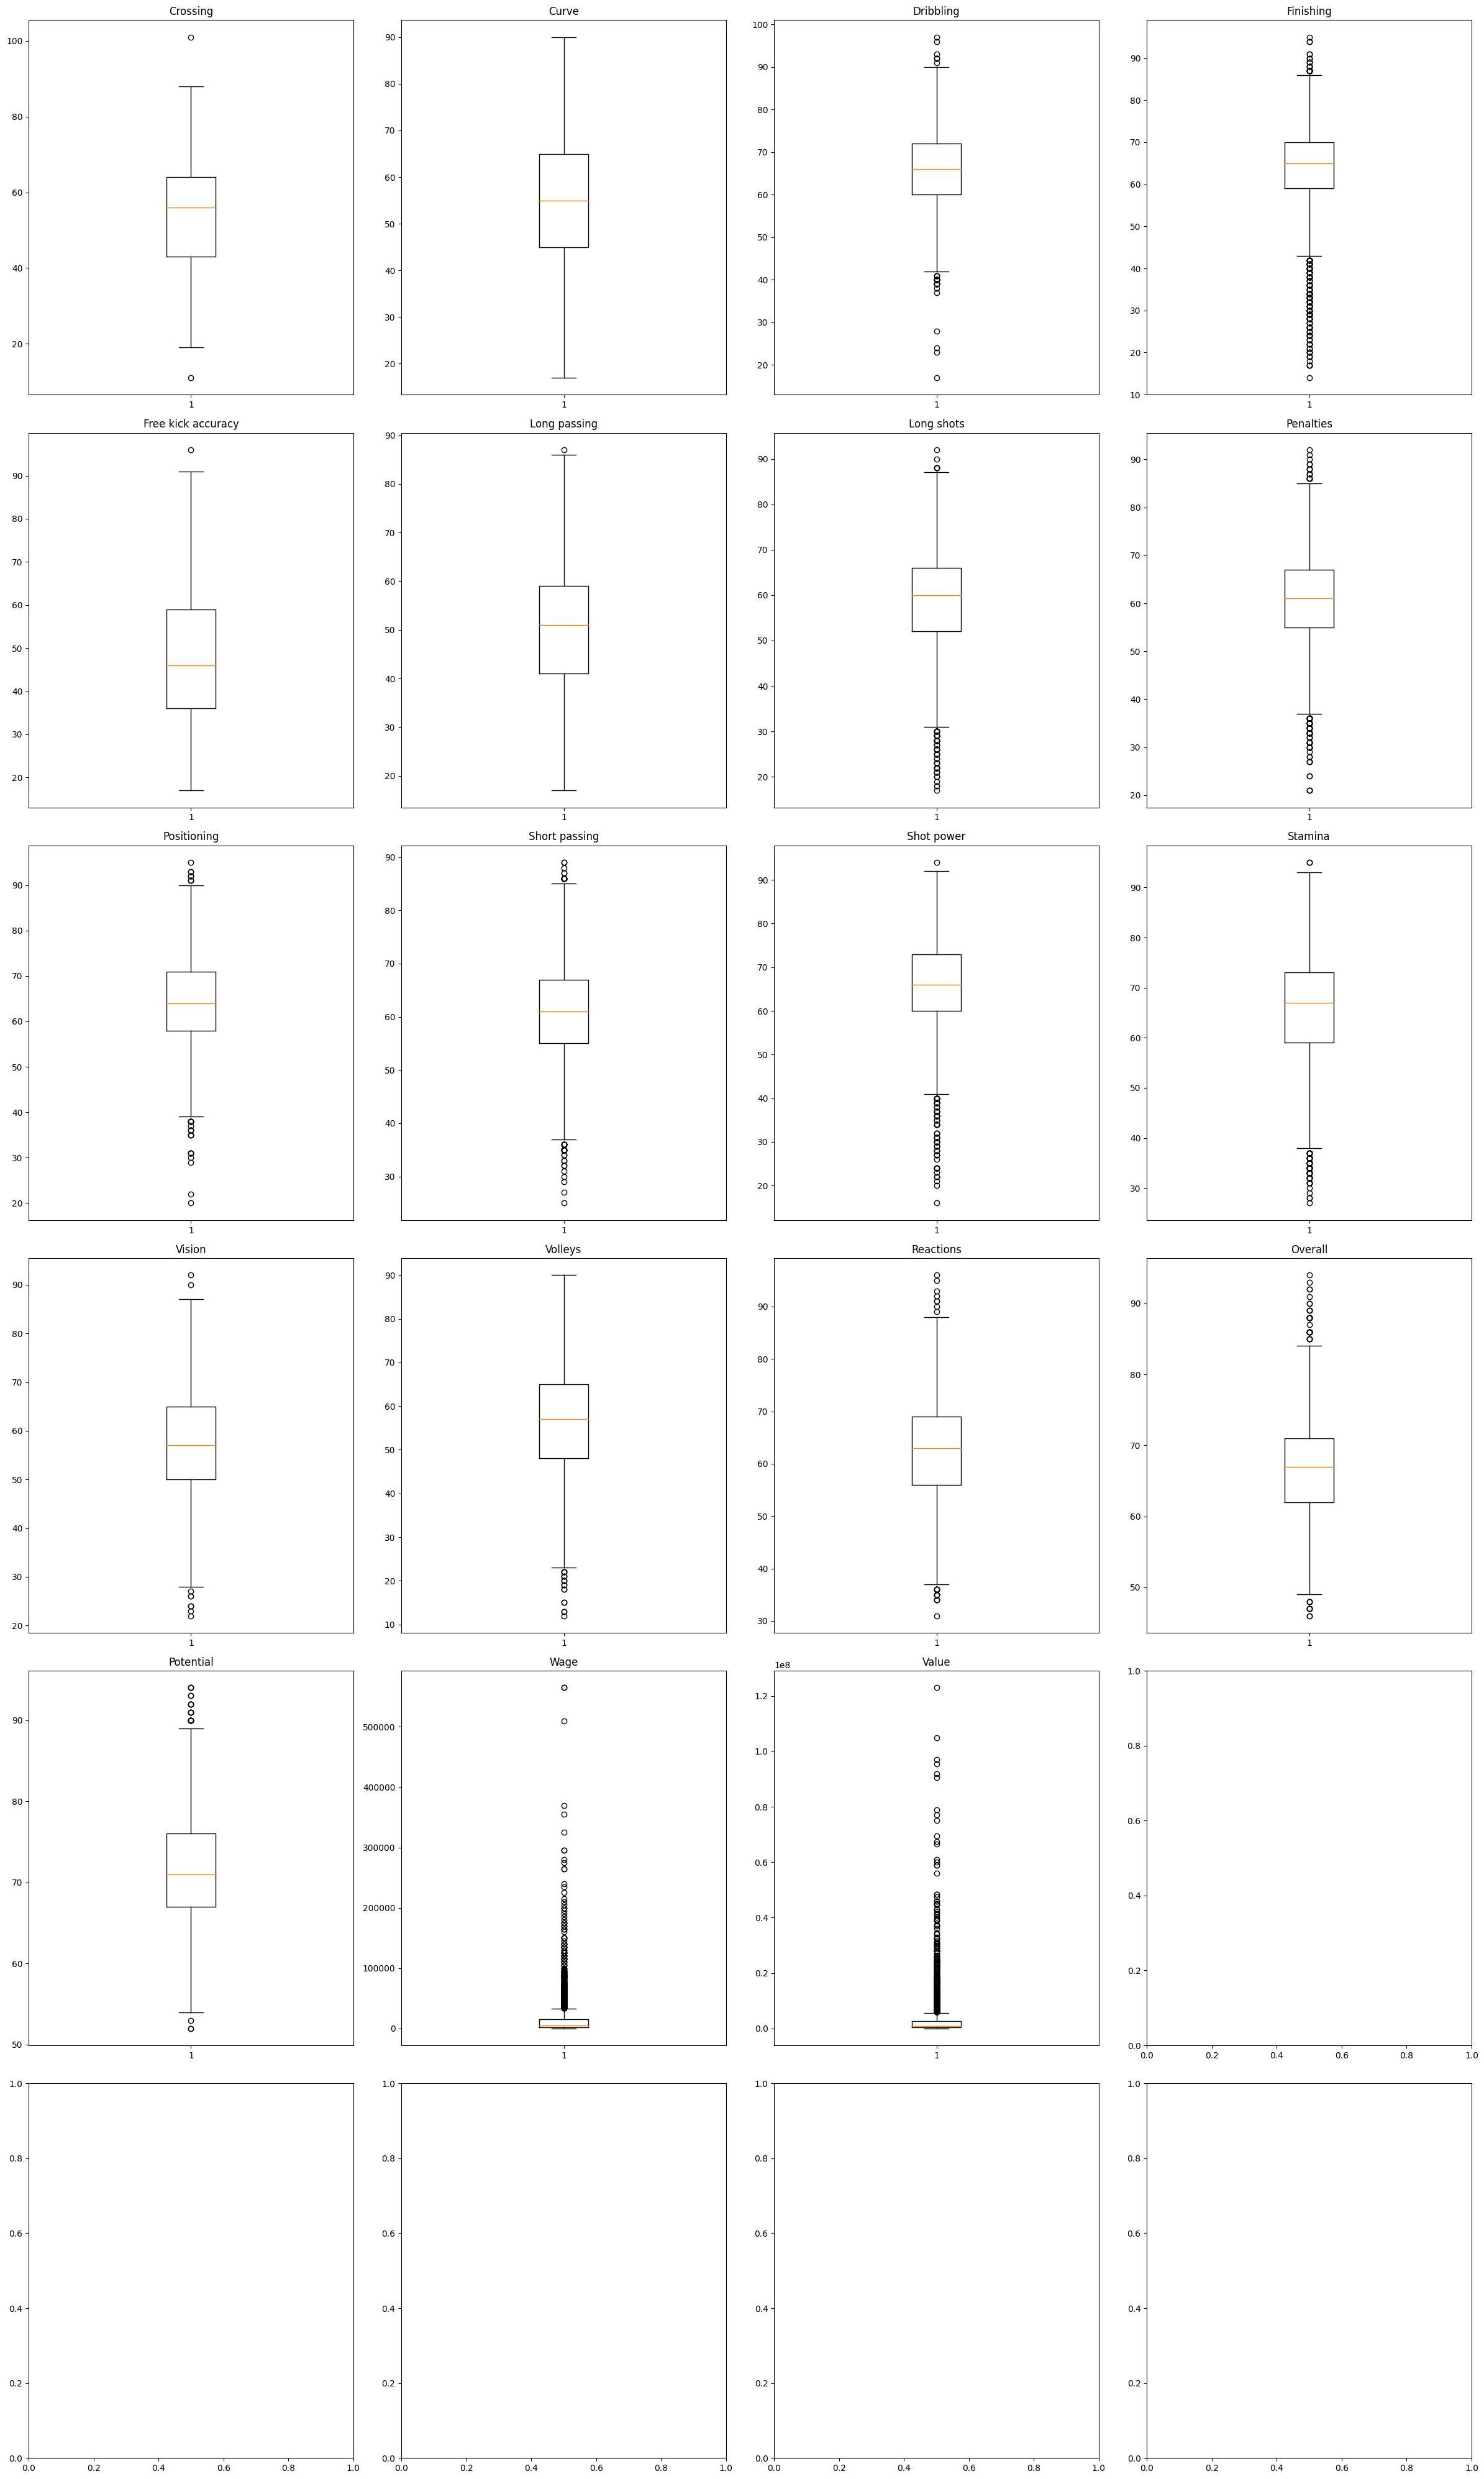

In [ ]:

rows = forwards.shape[1] // 4
fig, boxes = pyplot.subplots( nrows=rows+1, ncols=4, figsize=( 24, rows * 8 ) )

for feature, box in zip( forwards.iloc[ : , 4: ].columns, boxes.flat ):
  box.boxplot( forwards[feature] )
  box.set_title( feature )

pyplot.tight_layout()
pyplot.show()



In [ ]:
outlier_index = []

for i in forwards.iloc[ :, :-2 ]:
  q1 = forwards[i].quantile(0.25)
  q3 = forwards[i].quantile(0.75)
  iqr = q3 - q1

  lb = q1 - 1.5 * iqr
  ub = q3 + 1.5 * iqr

  outliers = forwards[(forwards[i] < lb) | (forwards[i] > ub)]

  # uncomment to print output

  # print(f"\n{i} : \n")
  # print( outliers[ [ 'Name', i ] ] )
  # print("*"*500)

  outlier_index.extend( outliers.index )


In [ ]:
outlier_index = set( outlier_index )
print( outlier_index )

{0, 1, 2050, 3, 2, 5, 4, 7, 8, 9, 4105, 11, 10, 13, 6, 14, 15, 17, 2060, 4115, 20, 2064, 21, 23, 24, 25, 4120, 19, 28, 22, 26, 31, 32, 33, 27, 4131, 29, 4133, 38, 2087, 4134, 41, 4137, 39, 44, 4142, 4143, 49, 51, 53, 54, 4150, 4153, 58, 59, 60, 2108, 2109, 63, 4158, 62, 65, 66, 12, 2117, 2111, 4168, 2122, 76, 79, 16, 4178, 82, 2133, 4181, 86, 18, 92, 4190, 97, 4197, 4203, 107, 108, 2161, 114, 4219, 4220, 2173, 126, 4228, 134, 2182, 138, 4505, 4239, 4240, 4247, 2201, 2203, 4256, 4262, 168, 2217, 4265, 4267, 4273, 4106, 4278, 4108, 4286, 2239, 2241, 4290, 2243, 2245, 4296, 4299, 4300, 4304, 2258, 4307, 4306, 215, 4312, 4313, 2266, 4114, 4315, 4317, 2275, 2280, 2284, 2286, 2289, 4337, 2292, 4342, 2297, 4346, 4347, 2301, 2307, 2308, 4363, 2317, 4366, 4367, 2318, 4368, 275, 2324, 276, 4372, 4376, 4379, 2332, 2335, 292, 2344, 2350, 4398, 302, 4405, 4406, 4408, 4410, 2371, 4425, 4428, 4429, 4433, 4434, 2389, 4439, 4447, 4453, 4454, 365, 4462, 371, 4469, 4470, 4473, 4478, 4480, 4485, 391, 394,

In [ ]:
len( outlier_index )

522

In [ ]:
forwards.shape

(4562, 23)

In [ ]:
fw = forwards.drop( outlier_index )

In [ ]:
fw.shape

(4040, 23)

In [ ]:
fw.to_csv("/content/drive/MyDrive/PYTHON/data_science/Projects/3. FIFA 18 Player Value Prediction/Preprocessed/for_models/fw.csv", index=False)

## Midfield

In [ ]:
data.columns

Index(['Name', 'Nationality', 'Club', 'Preferred Positions', 'Age', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'Overall', 'Potential', 'Value',
       'Wage'],
      dtype='object')

In [ ]:
midfield = data[[ 'Name', 'Nationality', 'Club', 'Preferred Positions', 'Age',
        'Special', 'Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'Overall', 'Potential', 'Wage', 'Value']]

In [ ]:
print( midfield['Preferred Positions'].unique().tolist() )

['ST LW ', 'RW ', 'LW ', 'ST ', 'GK ', 'CDM CM ', 'CB ', 'RM LW ST LM ', 'RM CM CAM ', 'RW RM ', 'RW CAM ', 'ST CAM ', 'CDM CAM CM ', 'LW RW ST ', 'LB ', 'LM CM ', 'LM CM CAM ', 'CM ', 'CM CDM ', 'LM RM CAM ', 'CDM CB ', 'ST LW CF ', 'CAM CDM CM ', 'LW LM ', 'CAM CM ', 'LW ST LM ', 'CAM LW ', 'ST CAM RW CF ', 'LM LB ', 'CM CB LB ', 'LM RM CAM CM ', 'LW RW ', 'LB RB CB ', 'CDM ', 'LM RW RM ', 'RM LM ', 'CAM RM RW ', 'RM CAM ', 'RB ', 'CAM LM ', 'LM CAM LW ', 'LW LM RM CAM ', 'RM ', 'LM CF CAM ', 'LM RM CM ', 'CB RB ', 'CF ST ', 'CM CAM ', 'ST CF ', 'LM ST ', 'LM ', 'CAM ', 'LM RM ', 'LM CAM RW LW ', 'CF CM CAM ', 'RWB RB ', 'LM CAM ', 'CAM LW RW ', 'CAM CF ST ', 'RW ST ', 'CM CB CDM ', 'CF CAM ', 'RW LW CM ', 'LW CM ', 'RB CB ', 'CAM ST CF ', 'LW RM LM ', 'RM CDM CM ', 'RM RB ', 'RB CM CDM ', 'LW RW CM ', 'RM CM LM ', 'ST RW ', 'LWB LB ', 'CAM CM CDM ', 'CAM CF ', 'CAM LW CM ', 'RM CM ', 'RM RW ', 'LM ST RM ', 'ST LM ', 'LM CF RM ', 'LM RW LW ', 'ST RM LM ', 'CB CDM ', 'CAM LM CM ', 'LB

In [ ]:
# removing all players that doesn't prefer midfield positions.

pos = ['CAM', 'CDM', 'CM', 'LAM', 'LCM', 'LDM', 'LM', 'RAM', 'RCM', 'RDM', 'RM', 'unknown']

for x in midfield['Preferred Positions'].unique().tolist():
  if not any( i in  x for i in pos ):
    ind = midfield[  midfield['Preferred Positions'] == x].index.tolist()
    midfield = midfield.drop(ind, axis=0)

In [ ]:
midfield.reset_index(drop=True, inplace=True)

In [ ]:
midfield.shape

(8521, 39)

In [ ]:
midfield.to_csv( "/content/drive/MyDrive/PYTHON/data_science/Projects/3. FIFA 18 Player Value Prediction/Preprocessed/midfield.csv", index=False )

In [ ]:
midfield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8521 entries, 0 to 8520
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 8521 non-null   object 
 1   Nationality          8521 non-null   object 
 2   Club                 8411 non-null   object 
 3   Preferred Positions  8521 non-null   object 
 4   Age                  8521 non-null   int64  
 5   Special              8521 non-null   int64  
 6   Acceleration         8521 non-null   float64
 7   Aggression           8521 non-null   float64
 8   Agility              8521 non-null   float64
 9   Balance              8521 non-null   float64
 10  Ball control         8521 non-null   float64
 11  Composure            8521 non-null   float64
 12  Crossing             8521 non-null   float64
 13  Curve                8521 non-null   float64
 14  Dribbling            8521 non-null   float64
 15  Finishing            8521 non-null   f

In [ ]:
midfield = midfield.iloc[ :, 4: ]

In [ ]:
midfield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8521 entries, 0 to 8520
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 8521 non-null   int64  
 1   Special             8521 non-null   int64  
 2   Acceleration        8521 non-null   float64
 3   Aggression          8521 non-null   float64
 4   Agility             8521 non-null   float64
 5   Balance             8521 non-null   float64
 6   Ball control        8521 non-null   float64
 7   Composure           8521 non-null   float64
 8   Crossing            8521 non-null   float64
 9   Curve               8521 non-null   float64
 10  Dribbling           8521 non-null   float64
 11  Finishing           8521 non-null   float64
 12  Free kick accuracy  8521 non-null   float64
 13  Heading accuracy    8521 non-null   float64
 14  Interceptions       8521 non-null   float64
 15  Jumping             8521 non-null   float64
 16  Long p

In [ ]:
corr = midfield.corr()['Value']
corr.sort_values(ascending=False) * 100

Value                 100.000000
Wage                   83.930526
Overall                65.860264
Potential              60.796001
Ball control           58.041266
Reactions              55.237108
Short passing          54.744573
Special                54.742042
Composure              50.549927
Dribbling              50.222692
Vision                 49.222479
Positioning            44.703943
Long passing           43.513782
Long shots             41.825559
Crossing               40.926841
Curve                  40.313733
Volleys                40.228569
Shot power             40.148511
Finishing              37.760666
Free kick accuracy     34.426614
Penalties              32.984911
Stamina                27.308087
Agility                24.369347
Heading accuracy       21.008419
Acceleration           18.771901
Aggression             18.005381
Interceptions          17.357150
Sprint speed           16.497500
Strength               13.850595
Standing tackle        13.353286
Balance   

In [ ]:
lst = corr[ corr < 0.25 ].sort_values().index.tolist()
print( lst )

midfield = midfield.drop( lst, axis=1 )

['Age', 'Marking', 'Jumping', 'Sliding tackle', 'Balance', 'Standing tackle', 'Strength', 'Sprint speed', 'Interceptions', 'Aggression', 'Acceleration', 'Heading accuracy', 'Agility']


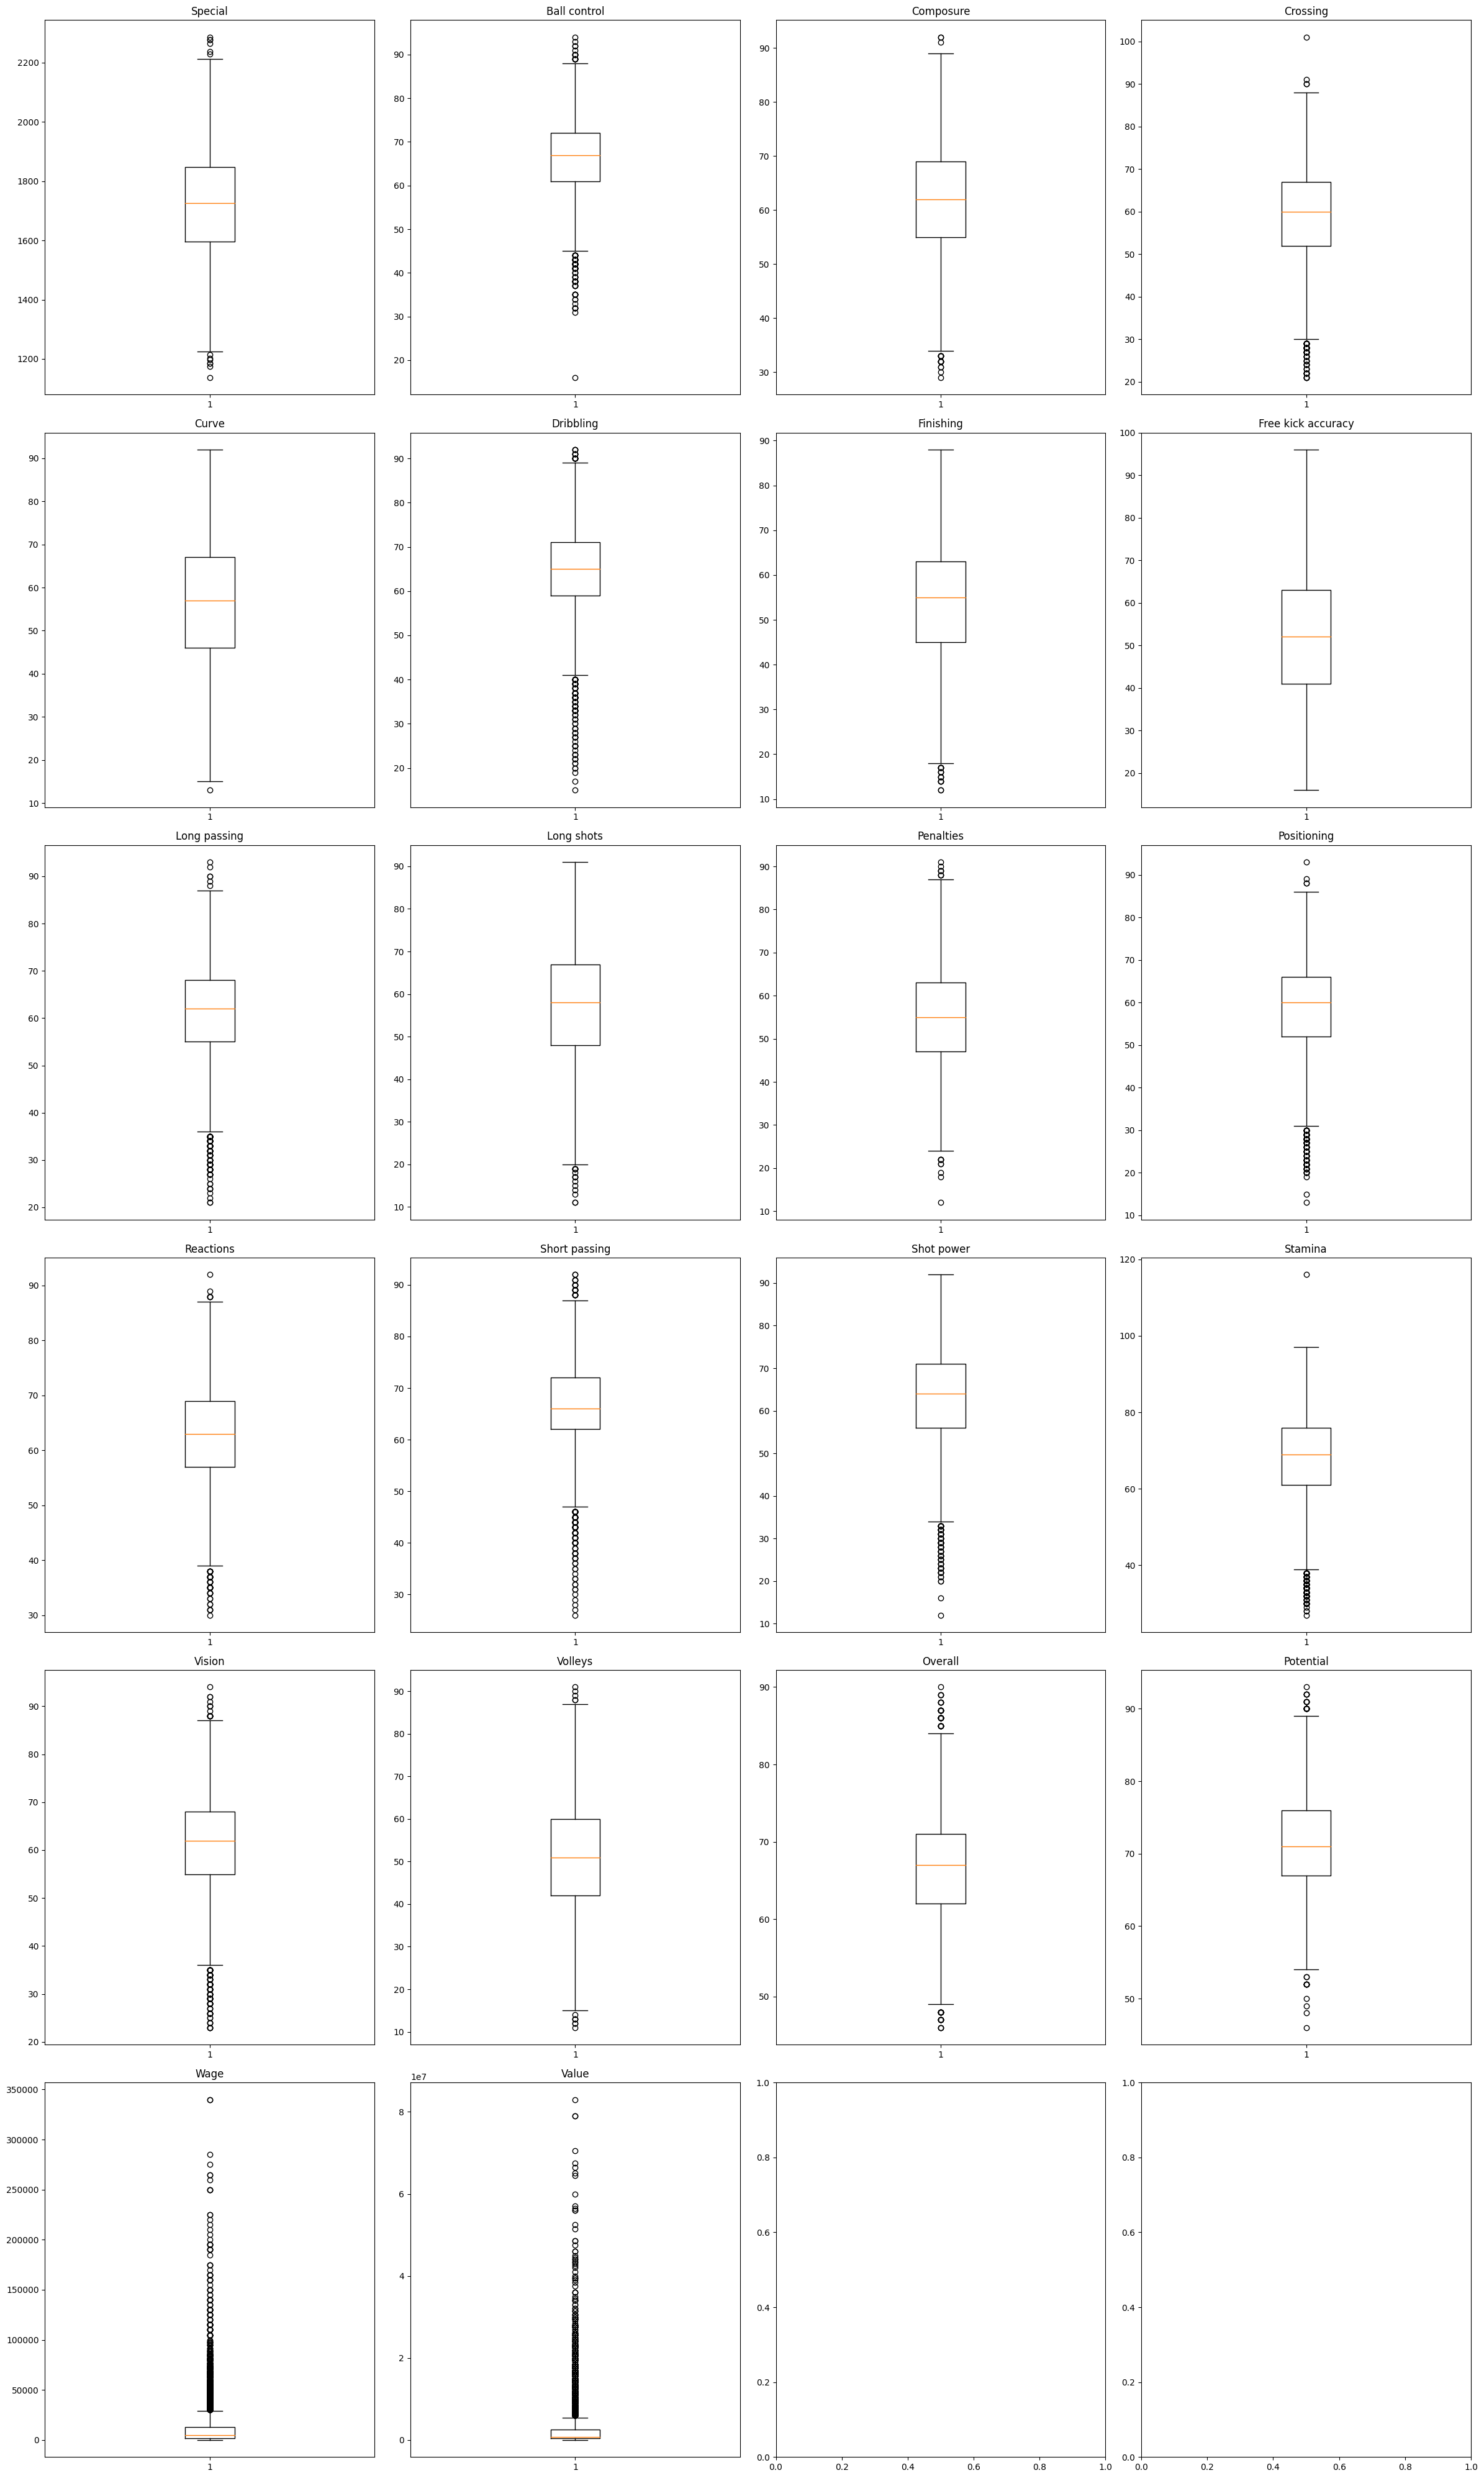

In [ ]:

rows = midfield.shape[1] // 4
fig, boxes = pyplot.subplots( nrows=rows+1, ncols=4, figsize=( 24, rows * 8 ))

for feature, box in  zip( midfield.columns, boxes.flat ) :
  box.boxplot( x=midfield[feature] )
  box.set_title(feature)

pyplot.tight_layout()
pyplot.show()

In [ ]:

outlier_index = []

for i in midfield.iloc[ :, :-2 ]:
  q1 = midfield[i].quantile(0.25)
  q3 = midfield[i].quantile(0.75)
  iqr = q3 - q1

  lb = q1 - 1.5 * iqr
  ub = q3 + 1.5 * iqr

  outliers = midfield[(midfield[i] < lb) | (midfield[i] > ub)]

  # uncomment to print outliers

  # print(f"{i} : \n")
  # print(outliers[['Name', i]])
  # print("*"*500)

  outlier_index.extend( outliers.index )


In [ ]:
outlier_index = set( outlier_index )
print( outlier_index )

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 8200, 12, 8204, 14, 15, 11, 6159, 18, 19, 20, 8213, 6162, 23, 24, 4119, 26, 27, 8220, 21, 30, 8223, 32, 28, 8226, 35, 6178, 29, 31, 8231, 40, 8232, 8234, 8235, 45, 46, 4142, 48, 8241, 8242, 8243, 52, 51, 47, 8248, 6201, 4154, 57, 8252, 56, 4159, 8255, 65, 13, 6210, 4164, 69, 6213, 71, 72, 6217, 6215, 6216, 8266, 4173, 6222, 8270, 8272, 6224, 78, 8271, 6228, 6229, 86, 6231, 2135, 16, 2138, 91, 6236, 8284, 6238, 17, 8290, 8291, 8292, 6245, 8293, 6249, 4202, 8299, 4204, 109, 8302, 8303, 8304, 8298, 114, 6250, 8305, 108, 8310, 6263, 8312, 8313, 6258, 6267, 8316, 121, 25, 4224, 129, 131, 132, 8324, 8323, 8330, 8331, 6284, 8333, 8334, 8335, 8339, 4245, 8341, 6296, 8344, 156, 8349, 157, 4253, 160, 4260, 165, 8358, 4263, 33, 8357, 170, 34, 8365, 8366, 8367, 8369, 2225, 4275, 8371, 8373, 8374, 185, 8377, 4283, 8378, 8380, 8382, 8379, 6339, 8388, 8389, 8393, 6146, 8396, 6348, 2255, 6147, 208, 4307, 2259, 8405, 4310, 8403, 8406, 6355, 8411, 8413, 8416, 4325, 637

In [ ]:
len( outlier_index )

768

In [ ]:
midfield.shape

(8521, 22)

In [ ]:
md = midfield.drop( outlier_index )

In [ ]:
md.shape

(7753, 22)

In [ ]:
md.to_csv("/content/drive/MyDrive/PYTHON/data_science/Projects/3. FIFA 18 Player Value Prediction/Preprocessed/for_models/md.csv", index=False)

## Defenders

In [ ]:
data.columns

Index(['Name', 'Nationality', 'Club', 'Preferred Positions', 'Age', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'Overall', 'Potential', 'Value',
       'Wage'],
      dtype='object')

In [ ]:
defenders = data[[ 'Name', 'Nationality', 'Club', 'Preferred Positions', 'Age',
                'Special', 'Acceleration', 'Aggression', 'Agility',
                'Composure', 'Crossing', 'Curve', 'Dribbling',
                'Free kick accuracy', 'Heading accuracy',
                'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
                'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
                'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
                'Strength', 'Vision', 'Volleys', 'Overall', 'Potential', 'Wage', 'Value' ]]

In [ ]:
print( defenders['Preferred Positions'].unique().tolist() )

['ST LW ', 'RW ', 'LW ', 'ST ', 'GK ', 'CDM CM ', 'CB ', 'RM LW ST LM ', 'RM CM CAM ', 'RW RM ', 'RW CAM ', 'ST CAM ', 'CDM CAM CM ', 'LW RW ST ', 'LB ', 'LM CM ', 'LM CM CAM ', 'CM ', 'CM CDM ', 'LM RM CAM ', 'CDM CB ', 'ST LW CF ', 'CAM CDM CM ', 'LW LM ', 'CAM CM ', 'LW ST LM ', 'CAM LW ', 'ST CAM RW CF ', 'LM LB ', 'CM CB LB ', 'LM RM CAM CM ', 'LW RW ', 'LB RB CB ', 'CDM ', 'LM RW RM ', 'RM LM ', 'CAM RM RW ', 'RM CAM ', 'RB ', 'CAM LM ', 'LM CAM LW ', 'LW LM RM CAM ', 'RM ', 'LM CF CAM ', 'LM RM CM ', 'CB RB ', 'CF ST ', 'CM CAM ', 'ST CF ', 'LM ST ', 'LM ', 'CAM ', 'LM RM ', 'LM CAM RW LW ', 'CF CM CAM ', 'RWB RB ', 'LM CAM ', 'CAM LW RW ', 'CAM CF ST ', 'RW ST ', 'CM CB CDM ', 'CF CAM ', 'RW LW CM ', 'LW CM ', 'RB CB ', 'CAM ST CF ', 'LW RM LM ', 'RM CDM CM ', 'RM RB ', 'RB CM CDM ', 'LW RW CM ', 'RM CM LM ', 'ST RW ', 'LWB LB ', 'CAM CM CDM ', 'CAM CF ', 'CAM LW CM ', 'RM CM ', 'RM RW ', 'LM ST RM ', 'ST LM ', 'LM CF RM ', 'LM RW LW ', 'ST RM LM ', 'CB CDM ', 'CAM LM CM ', 'LB

In [ ]:
# removing all players that doesn't prefer defender positions.

pos = [ 'CB', 'LB', 'LCB', 'LWB', 'RB', 'RCB', 'RWB', 'unknown' ]

for x in defenders['Preferred Positions'].unique().tolist():
  if not any( i in  x for i in pos ):
    ind = defenders[  defenders['Preferred Positions'] == x].index.tolist()
    defenders = defenders.drop(ind, axis=0)

In [ ]:
defenders.reset_index(drop=True, inplace=True)

In [ ]:
defenders.shape

(6467, 36)

In [ ]:
defenders.to_csv( "/content/drive/MyDrive/PYTHON/data_science/Projects/3. FIFA 18 Player Value Prediction/Preprocessed/defenders.csv", index=False )

In [ ]:
defenders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6467 entries, 0 to 6466
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 6467 non-null   object 
 1   Nationality          6467 non-null   object 
 2   Club                 6370 non-null   object 
 3   Preferred Positions  6467 non-null   object 
 4   Age                  6467 non-null   int64  
 5   Special              6467 non-null   int64  
 6   Acceleration         6467 non-null   float64
 7   Aggression           6467 non-null   float64
 8   Agility              6467 non-null   float64
 9   Composure            6467 non-null   float64
 10  Crossing             6467 non-null   float64
 11  Curve                6467 non-null   float64
 12  Dribbling            6467 non-null   float64
 13  Free kick accuracy   6467 non-null   float64
 14  Heading accuracy     6467 non-null   float64
 15  Interceptions        6467 non-null   f

In [ ]:
defenders = defenders.iloc[ :, 4: ]

In [ ]:
defenders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6467 entries, 0 to 6466
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 6467 non-null   int64  
 1   Special             6467 non-null   int64  
 2   Acceleration        6467 non-null   float64
 3   Aggression          6467 non-null   float64
 4   Agility             6467 non-null   float64
 5   Composure           6467 non-null   float64
 6   Crossing            6467 non-null   float64
 7   Curve               6467 non-null   float64
 8   Dribbling           6467 non-null   float64
 9   Free kick accuracy  6467 non-null   float64
 10  Heading accuracy    6467 non-null   float64
 11  Interceptions       6467 non-null   float64
 12  Jumping             6467 non-null   float64
 13  Long passing        6467 non-null   float64
 14  Long shots          6467 non-null   float64
 15  Marking             6467 non-null   float64
 16  Penalt

In [ ]:
corr = defenders.corr()['Value']
corr.sort_values(ascending=False) * 100

Value                 100.000000
Wage                   83.178521
Overall                66.247414
Potential              62.969758
Standing tackle        56.836731
Sliding tackle         56.341572
Reactions              56.049103
Interceptions          55.130790
Marking                52.523554
Composure              48.005989
Special                44.842984
Short passing          42.290591
Heading accuracy       41.961175
Long passing           38.435655
Aggression             37.348808
Shot power             31.705880
Vision                 27.238946
Dribbling              26.705633
Long shots             25.102648
Stamina                24.690705
Volleys                23.392234
Curve                  22.943553
Strength               22.588169
Penalties              20.361574
Crossing               19.467510
Jumping                19.174721
Free kick accuracy     18.918203
Positioning            18.067541
Sprint speed           16.964974
Acceleration           10.871634
Agility   

In [ ]:

lst = corr[ corr < 0.25 ].index.tolist()
print( lst )

defenders = defenders.drop( lst, axis=1 )

['Age', 'Acceleration', 'Agility', 'Crossing', 'Curve', 'Free kick accuracy', 'Jumping', 'Penalties', 'Positioning', 'Sprint speed', 'Stamina', 'Strength', 'Volleys']


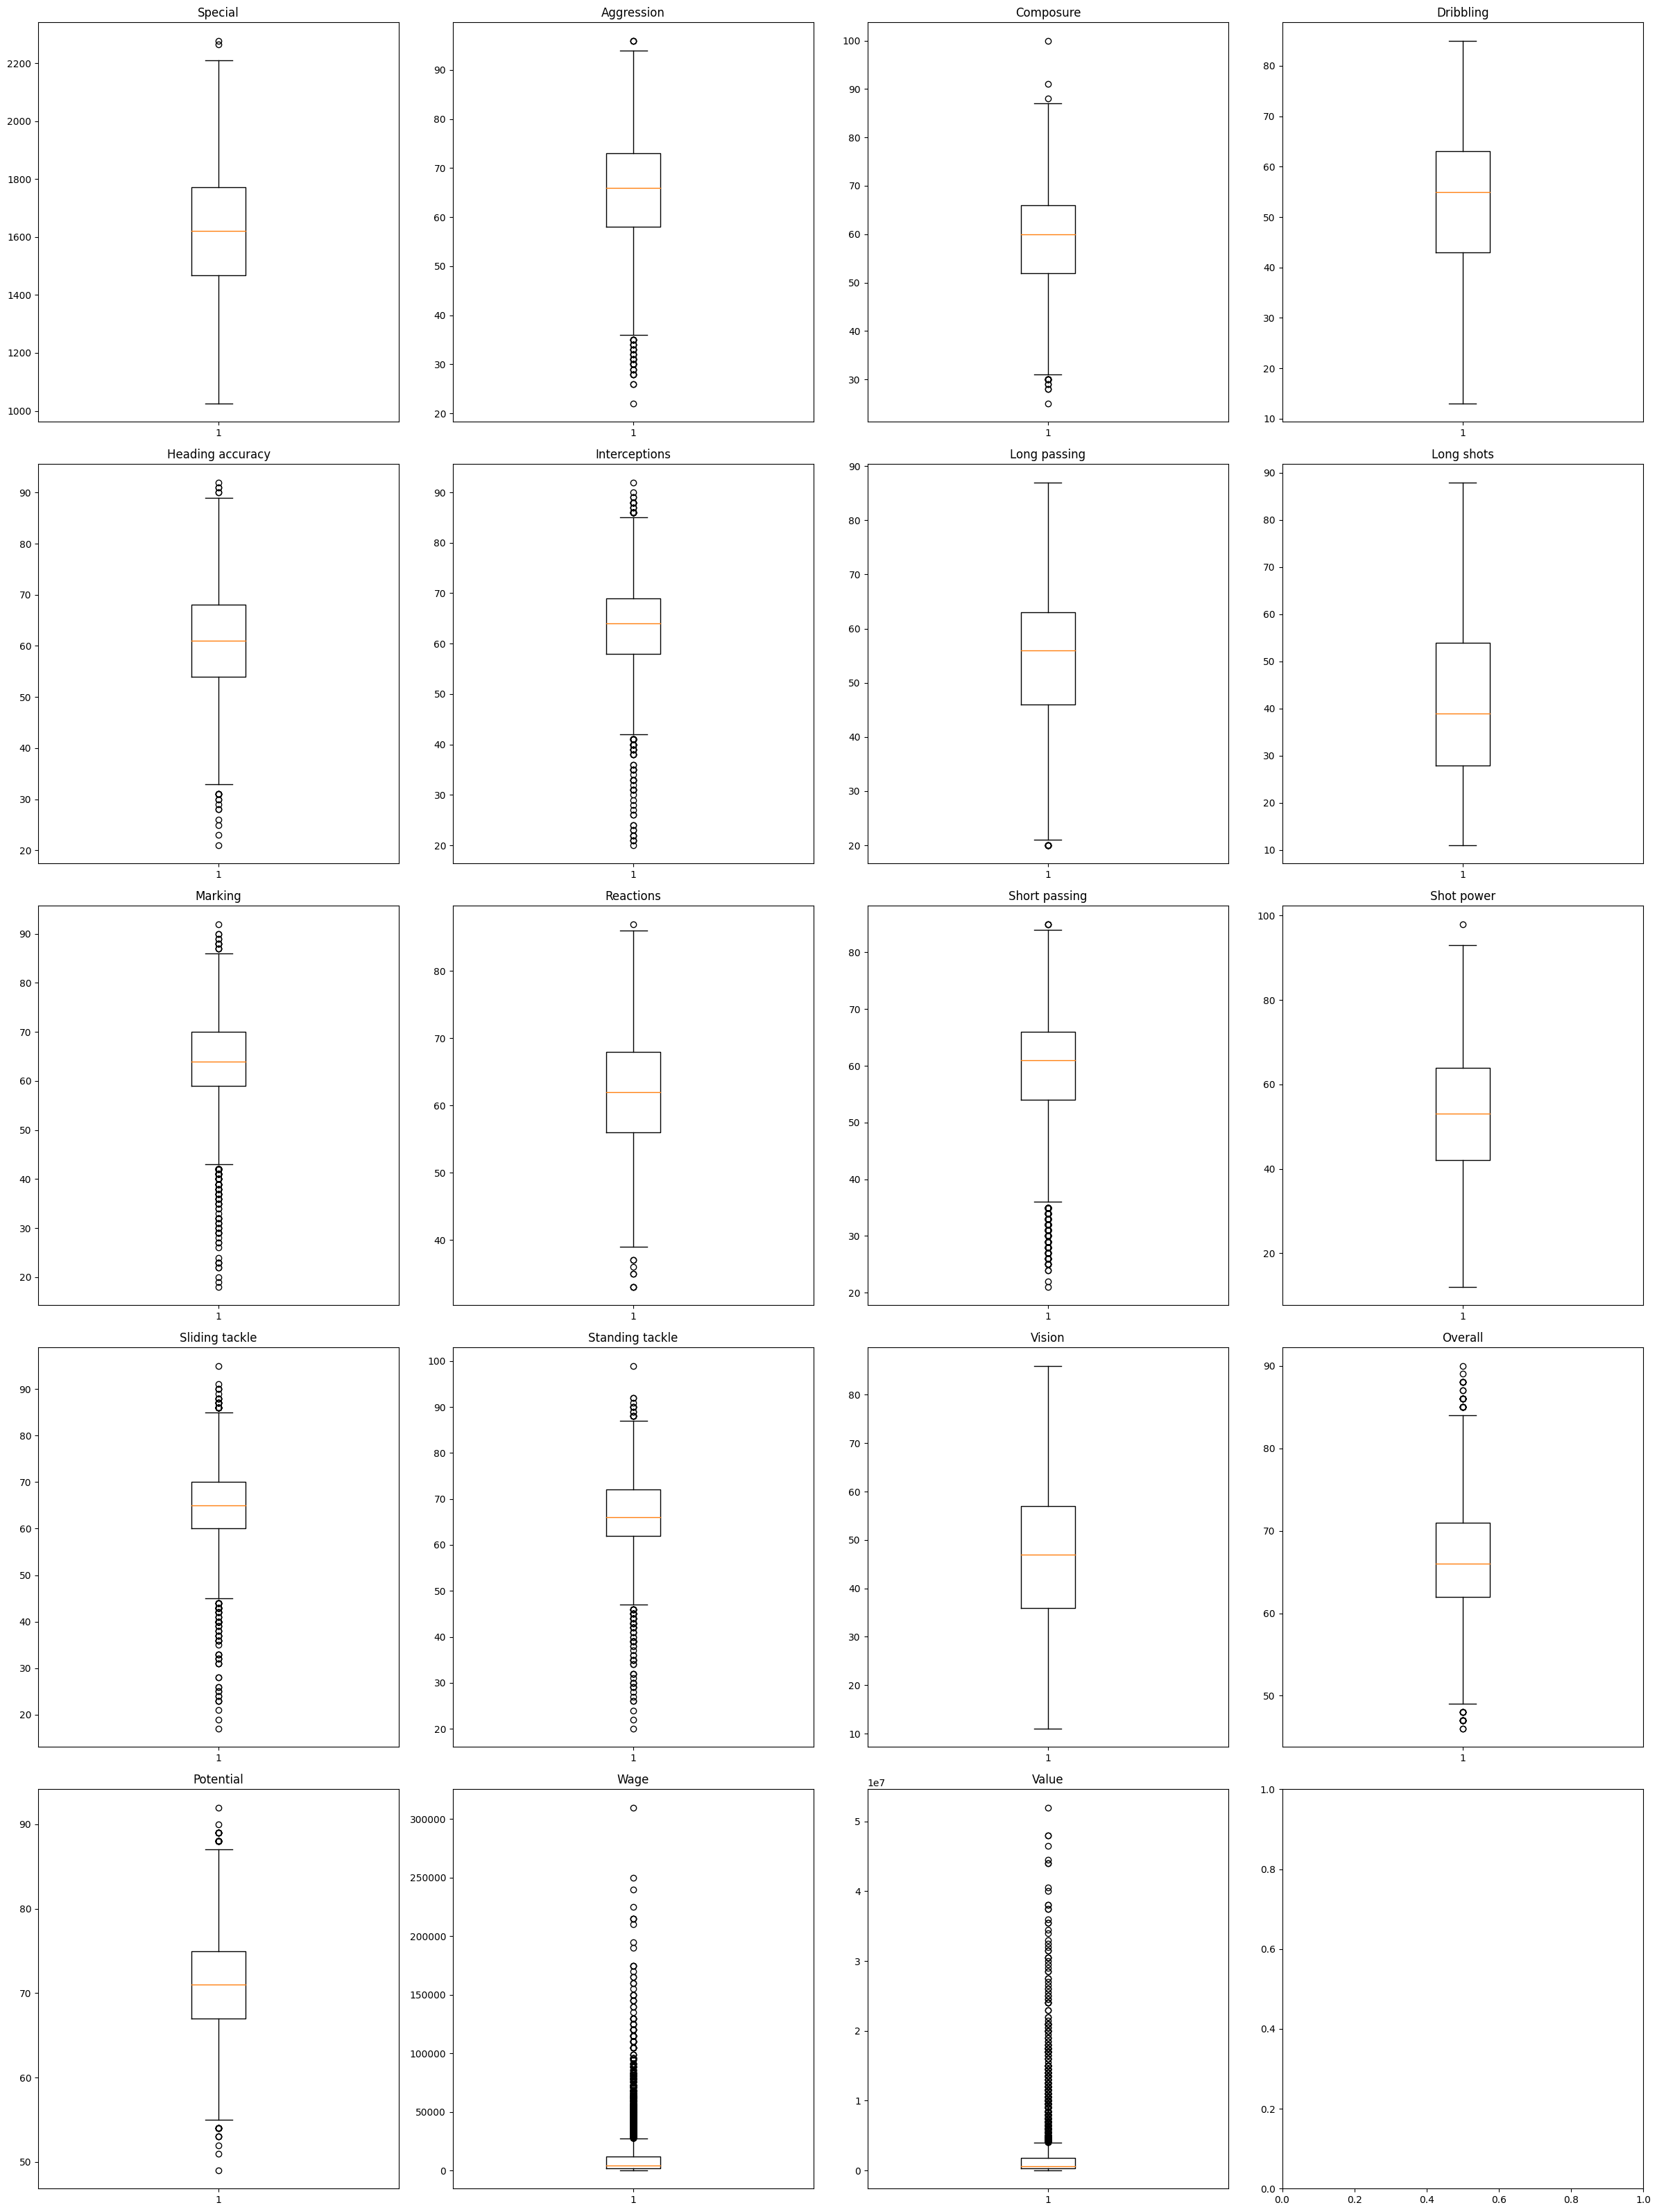

In [ ]:

rows = defenders.shape[1] // 4
fig, boxes = pyplot.subplots( nrows=rows+1, ncols=4, figsize=( 24, rows * 8 ))

for feature, box in  zip( defenders.columns, boxes.flat ) :
  box.boxplot( defenders[feature] )
  box.set_title(feature)

pyplot.tight_layout()
pyplot.show()


In [ ]:

outlier_index = []

for i in defenders.iloc[ :, :-2 ]:
  q1 = defenders[i].quantile(0.25)
  q3 = defenders[i].quantile(0.75)
  iqr = q3 - q1

  lb = q1 - 1.5 * iqr
  ub = q3 + 1.5 * iqr

  outliers = defenders[(defenders[i] < lb) | (defenders[i] > ub)]

  # print(f"{i} : \n")
  # print(outliers[['Name', i]])
  # print("*"*500)

  outlier_index.extend( outliers.index )


In [ ]:
outlier_index = set( outlier_index )
print( outlier_index )

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 6158, 14, 16, 17, 6160, 19, 15, 21, 22, 23, 6166, 6167, 6170, 27, 6171, 6172, 30, 29, 32, 33, 31, 6181, 6182, 6183, 40, 6184, 42, 6186, 4138, 4140, 46, 6190, 4143, 47, 6194, 49, 6196, 53, 48, 6192, 6203, 59, 6205, 64, 6209, 6210, 67, 4165, 70, 6215, 73, 2122, 6218, 4171, 6221, 6217, 6223, 6225, 6226, 83, 85, 6230, 89, 6233, 91, 6236, 6237, 6238, 6239, 94, 6241, 98, 4194, 4196, 4197, 6245, 6247, 20, 105, 97, 6253, 6255, 6256, 2161, 112, 6259, 6260, 6262, 6263, 6264, 24, 122, 6266, 6267, 6268, 6269, 6270, 128, 6272, 6271, 6274, 6276, 6277, 131, 6279, 6280, 6282, 139, 142, 6286, 6290, 6292, 6294, 6296, 6300, 157, 6303, 6304, 6307, 6309, 6310, 6314, 6315, 6316, 6317, 174, 6318, 6319, 6320, 6322, 6323, 6325, 6326, 6328, 6329, 6330, 6331, 37, 6333, 6334, 4287, 6336, 6335, 6340, 6341, 6145, 6343, 6347, 6348, 6349, 6350, 6351, 6353, 6355, 6148, 6358, 6359, 6360, 6362, 6363, 6364, 6366, 6367, 2273, 6369, 6370, 6371, 6373, 6374, 6375, 6376, 6378, 63

In [ ]:
len( outlier_index )

499

In [ ]:
defenders.shape

(6467, 19)

In [ ]:
df = defenders.drop( outlier_index )

In [ ]:
df.shape

(5968, 19)

In [ ]:
df.to_csv("/content/drive/MyDrive/PYTHON/data_science/Projects/3. FIFA 18 Player Value Prediction/Preprocessed/for_models/df.csv", index=False)

## GoalKeepers

In [ ]:
data.columns

Index(['Name', 'Nationality', 'Club', 'Preferred Positions', 'Age', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'Overall', 'Potential', 'Value',
       'Wage'],
      dtype='object')

In [ ]:
keepers = data[[ 'Name', 'Nationality', 'Club', 'Preferred Positions', 'Age', 'Special',
               'GK diving', 'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes',
               'Overall', 'Potential', 'Value', 'Wage' ]]

In [ ]:
print( keepers['Preferred Positions'].unique().tolist() )

['ST LW ', 'RW ', 'LW ', 'ST ', 'GK ', 'CDM CM ', 'CB ', 'RM LW ST LM ', 'RM CM CAM ', 'RW RM ', 'RW CAM ', 'ST CAM ', 'CDM CAM CM ', 'LW RW ST ', 'LB ', 'LM CM ', 'LM CM CAM ', 'CM ', 'CM CDM ', 'LM RM CAM ', 'CDM CB ', 'ST LW CF ', 'CAM CDM CM ', 'LW LM ', 'CAM CM ', 'LW ST LM ', 'CAM LW ', 'ST CAM RW CF ', 'LM LB ', 'CM CB LB ', 'LM RM CAM CM ', 'LW RW ', 'LB RB CB ', 'CDM ', 'LM RW RM ', 'RM LM ', 'CAM RM RW ', 'RM CAM ', 'RB ', 'CAM LM ', 'LM CAM LW ', 'LW LM RM CAM ', 'RM ', 'LM CF CAM ', 'LM RM CM ', 'CB RB ', 'CF ST ', 'CM CAM ', 'ST CF ', 'LM ST ', 'LM ', 'CAM ', 'LM RM ', 'LM CAM RW LW ', 'CF CM CAM ', 'RWB RB ', 'LM CAM ', 'CAM LW RW ', 'CAM CF ST ', 'RW ST ', 'CM CB CDM ', 'CF CAM ', 'RW LW CM ', 'LW CM ', 'RB CB ', 'CAM ST CF ', 'LW RM LM ', 'RM CDM CM ', 'RM RB ', 'RB CM CDM ', 'LW RW CM ', 'RM CM LM ', 'ST RW ', 'LWB LB ', 'CAM CM CDM ', 'CAM CF ', 'CAM LW CM ', 'RM CM ', 'RM RW ', 'LM ST RM ', 'ST LM ', 'LM CF RM ', 'LM RW LW ', 'ST RM LM ', 'CB CDM ', 'CAM LM CM ', 'LB

In [ ]:
# removing all players that doesn't prefer Goal Keeper positions.

for i in keepers['Preferred Positions'].unique():
  if 'GK' not in i :
    ind = keepers[  keepers['Preferred Positions'] == i ].index.tolist()
    keepers = keepers.drop(ind, axis=0)


In [ ]:
keepers.reset_index(drop=True, inplace=True)

In [ ]:
keepers.shape

(2029, 15)

In [ ]:
keepers.to_csv("/content/drive/MyDrive/PYTHON/data_science/Projects/3. FIFA 18 Player Value Prediction/Preprocessed/keepers.csv", index=False)

In [ ]:
keepers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 2029 non-null   object 
 1   Nationality          2029 non-null   object 
 2   Club                 1987 non-null   object 
 3   Preferred Positions  2029 non-null   object 
 4   Age                  2029 non-null   int64  
 5   Special              2029 non-null   int64  
 6   GK diving            2029 non-null   float64
 7   GK handling          2029 non-null   float64
 8   GK kicking           2029 non-null   float64
 9   GK positioning       2029 non-null   float64
 10  GK reflexes          2029 non-null   float64
 11  Overall              2029 non-null   int64  
 12  Potential            2029 non-null   int64  
 13  Value                2029 non-null   float64
 14  Wage                 2029 non-null   float64
dtypes: float64(7), int64(4), object(4)
mem

In [ ]:
keepers = keepers.iloc[ :, 4: ]

In [ ]:
keepers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2029 non-null   int64  
 1   Special         2029 non-null   int64  
 2   GK diving       2029 non-null   float64
 3   GK handling     2029 non-null   float64
 4   GK kicking      2029 non-null   float64
 5   GK positioning  2029 non-null   float64
 6   GK reflexes     2029 non-null   float64
 7   Overall         2029 non-null   int64  
 8   Potential       2029 non-null   int64  
 9   Value           2029 non-null   float64
 10  Wage            2029 non-null   float64
dtypes: float64(7), int64(4)
memory usage: 174.5 KB


In [ ]:
corr = keepers.corr()['Value']
corr.sort_values(ascending=False) * 100

Value             100.000000
Wage               80.125674
Overall            57.753521
Potential          56.814258
GK handling        54.767293
GK diving          53.889300
GK reflexes        53.343714
GK positioning     49.972186
GK kicking         42.808904
Special            42.773147
Age                 7.576179
Name: Value, dtype: float64

In [ ]:
lst = corr[ corr < 0.25 ].index.tolist()
print( lst )

kp_res = keepers.drop( lst, axis=1 )

['Age']


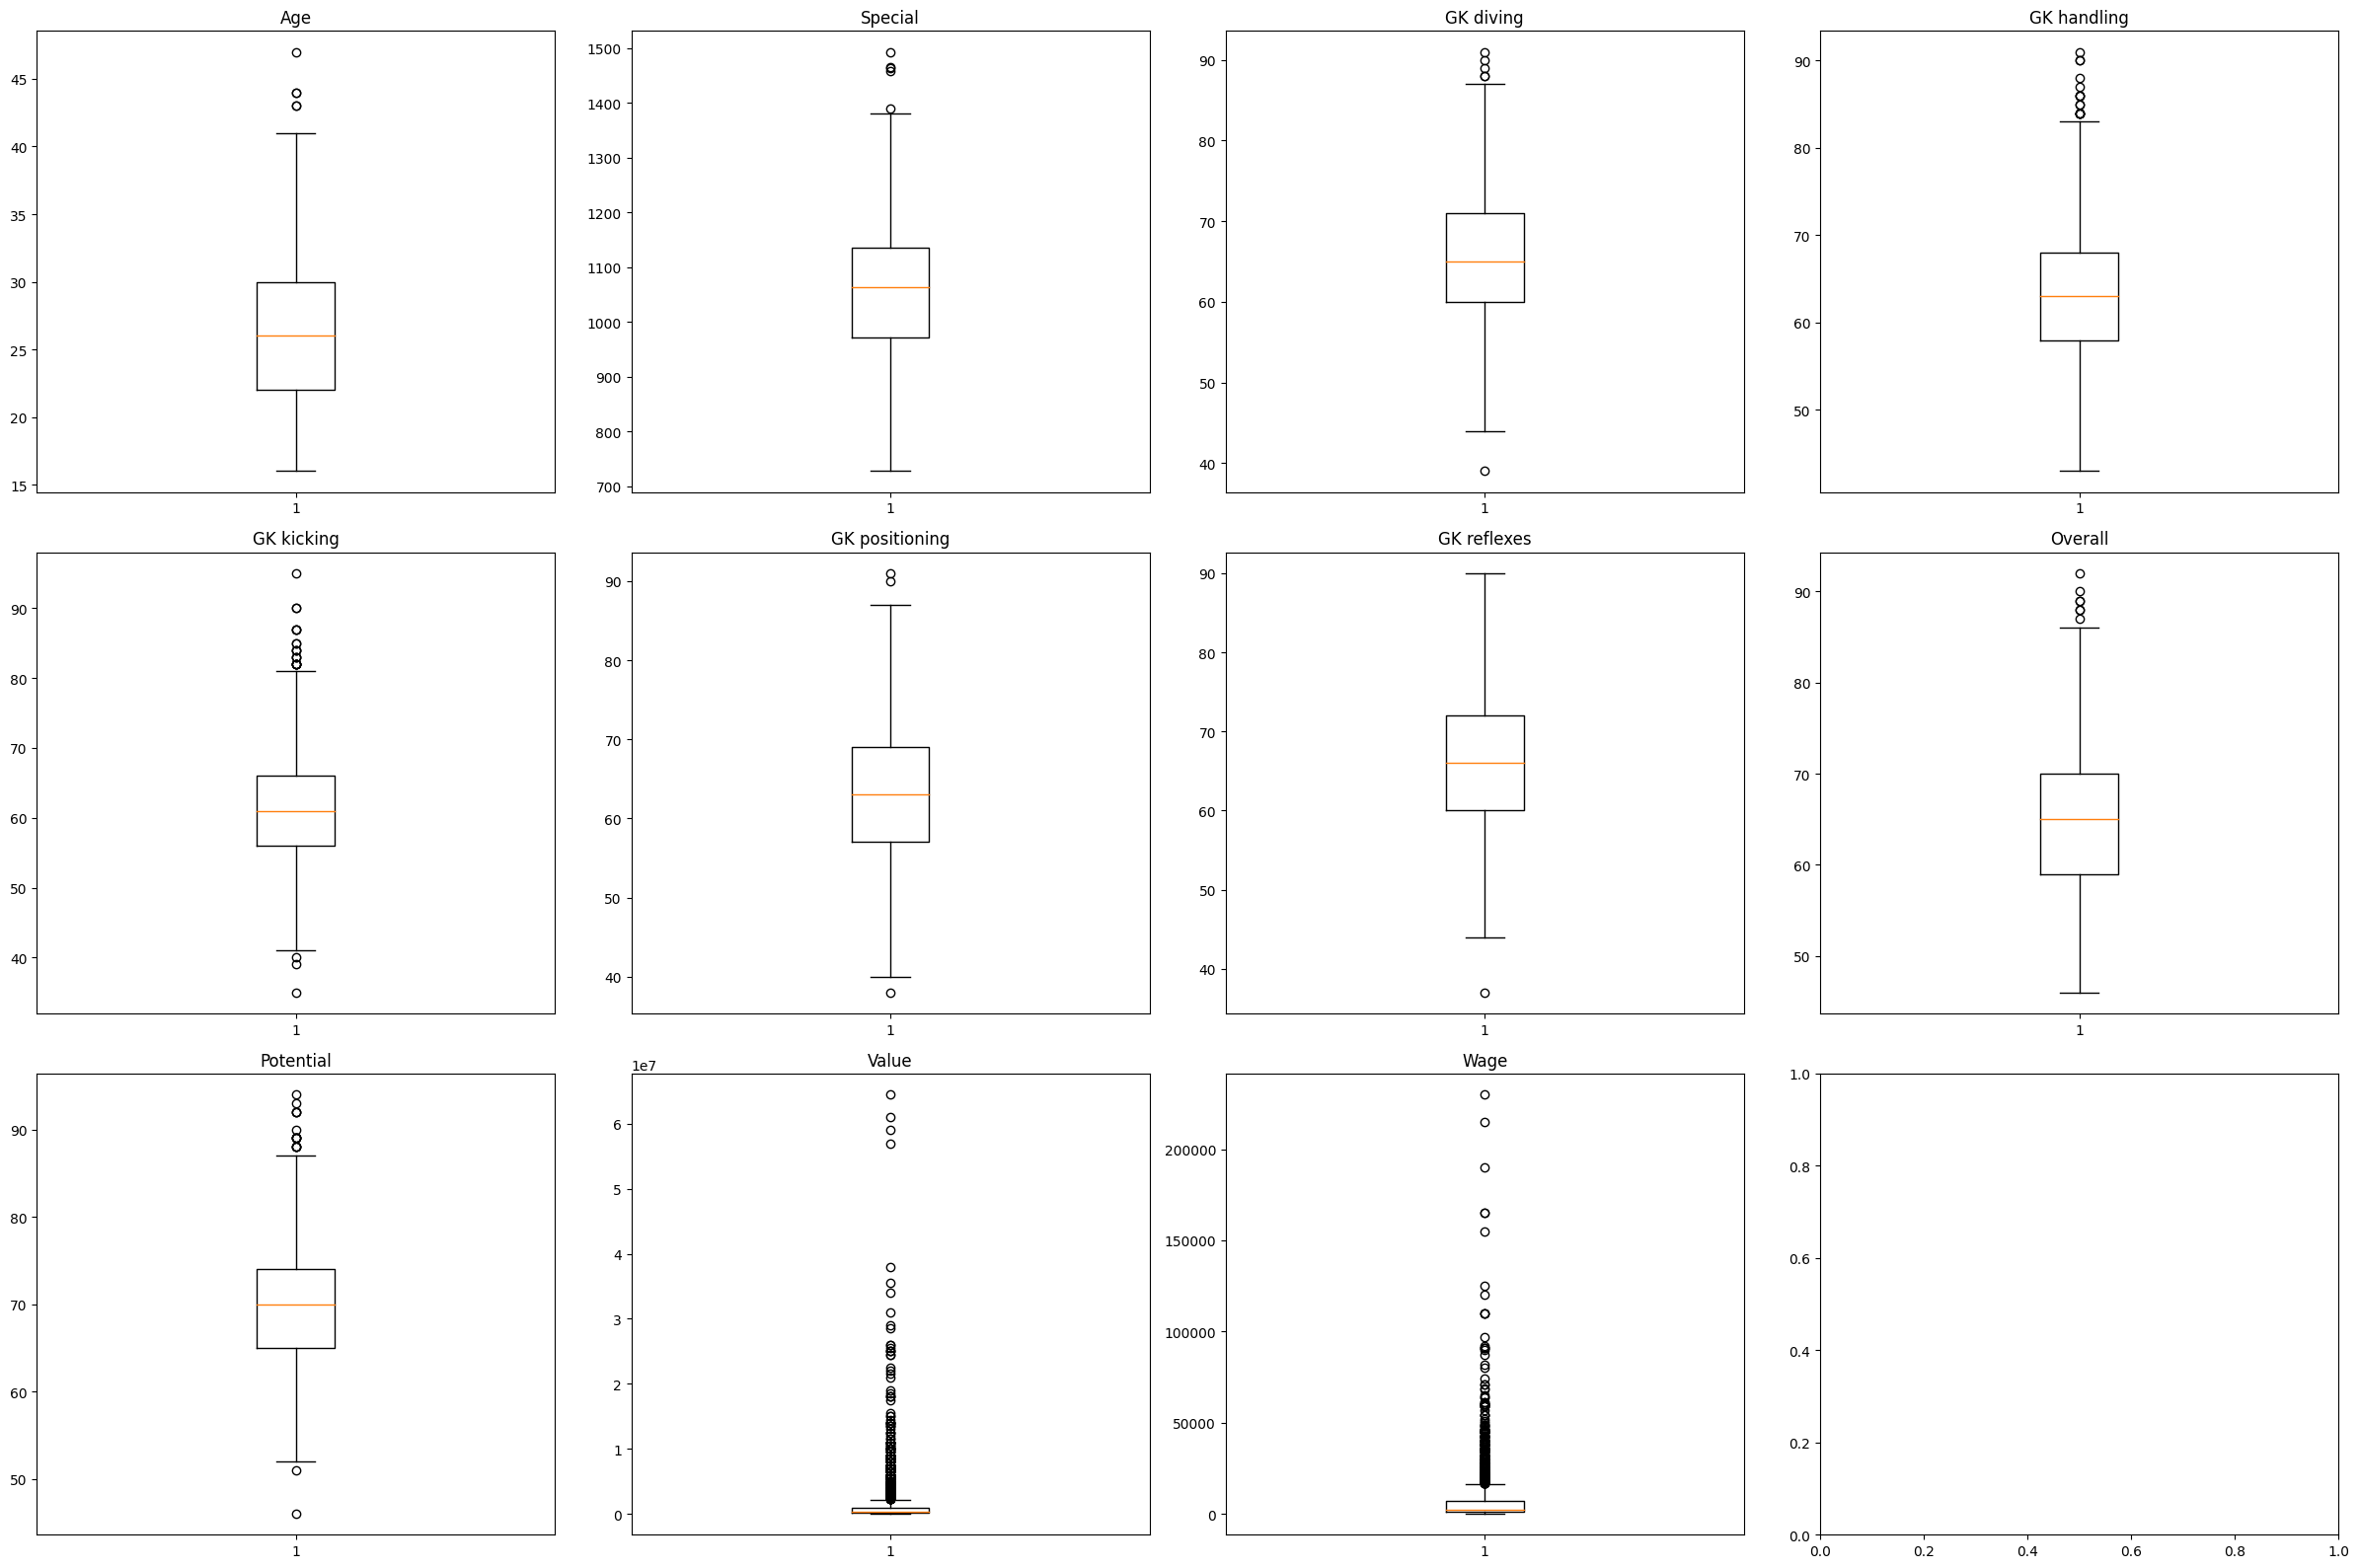

In [ ]:

rows = keepers.shape[1] // 4
fig, boxes = pyplot.subplots( nrows=rows+1, ncols=4, figsize=( 24, rows * 8 ))

for feature, box in  zip( keepers.columns, boxes.flat ) :
  box.boxplot( x=keepers[feature] )
  box.set_title( feature )


pyplot.tight_layout()
pyplot.show()

In [ ]:

ourlier_index = []

for i in keepers.iloc[ :, :-2 ]:
  q1 = keepers[i].quantile(0.25)
  q3 = keepers[i].quantile(0.75)
  iqr = q3 - q1

  lb = q1 - 1.5 * iqr
  ub = q3 + 1.5 * iqr

  outliers = keepers[(keepers[i] < lb) | (keepers[i] > ub)]

  # print(f"{i} : \n")
  # print(outliers[['Name', i]])
  # print("*"*500)

  ourlier_index.extend( outliers.index )


In [ ]:
ourlier_index = set( ourlier_index )
print( ourlier_index )

{0, 1, 2, 3, 4, 1797, 5, 6, 7, 8, 10, 1803, 9, 13, 16, 17, 658, 19, 147, 21, 22, 23, 24, 25, 410, 157, 32, 1187, 38, 40, 44, 1964, 1593, 58, 72, 722, 470, 471, 119, 2009, 91, 98, 2028, 108, 109, 375, 125, 255}


In [ ]:
len( ourlier_index )

48

In [ ]:
keepers.shape

(2029, 11)

In [ ]:
gk = keepers.drop( ourlier_index )

In [ ]:
gk.shape

(1981, 11)

In [ ]:
gk.to_csv("/content/drive/MyDrive/PYTHON/data_science/Projects/3. FIFA 18 Player Value Prediction/Preprocessed/for_models/gk.csv", index=False)